# N-Queens Problem – Constraint Satisfaction (Module 2)


## Problem Statement

Place 8 queens on an 8×8 chessboard such that **no two queens threaten each other**.

This means:
- No two queens share the same row,
- No two queens share the same column,
- No two queens share the same diagonal.

The goal is to find a valid configuration, not to maximize or minimize a numeric objective.



## What Is a Constraint Satisfaction Problem?

This is a classic **Constraint Satisfaction Problem (CSP)**.

### Definition:
A **Constraint Satisfaction Problem** is defined by:
- A set of **variables**: here, each row has one queen, so the variable is the column number per row.
- A **domain** for each variable: valid column indices (0–7).
- A set of **constraints**: in our case, queens must not attack each other.

Unlike optimization problems where we minimize or maximize an objective function, CSPs focus on **finding valid configurations** that satisfy all constraints.


### How Do Queens Attack on a Chessboard?

If you’ve never played chess, here’s a helpful way to understand the board and the movement of queens:

- A standard chessboard is **8×8**, meaning it has 8 rows and 8 columns.
- You can think of the board as a **grid**:
  - Rows are numbered from top to bottom: 0 to 7.
  - Columns are numbered from left to right: 0 to 7.
- Each square on the board can be described by a pair: **(row, column)**.

#### Queen's Movement
A queen in chess can move:
- Horizontally → same row, different columns
- Vertically → same column, different rows
- Diagonally → the difference between row and column changes equally (i.e., same slope)

---
### How to Detect Queen Conflicts

If two queens are on the board at positions:

- **(r₁, c₁)** = row and column of the first queen  
- **(r₂, c₂)** = row and column of the second queen

Then they are in **conflict** if:

- **Same row:**  
  $$ r_1 = r_2 $$

- **Same column:**  
  $$ c_1 = c_2 $$

- **Same diagonal:**  
  $$ |r_1 - r_2| = |c_1 - c_2| $$

---

### Why This Works

- A **row conflict** means the queens are on the same horizontal line.
- A **column conflict** means they’re on the same vertical line.
- A **diagonal conflict** means they can reach each other with equal horizontal and vertical moves.
---

### Example:
- Queen A is at position (2, 3)
- Queen B is at position (5, 6)

Then:
- $$|r_1 - r_2| = |2 - 5| = 3$$  
- $$|c_1 - c_2| = |3 - 6| = 3$$

Since these are equal, they are **on the same diagonal** and would be able to attack each other — which is not allowed in a valid N-Queens solution.

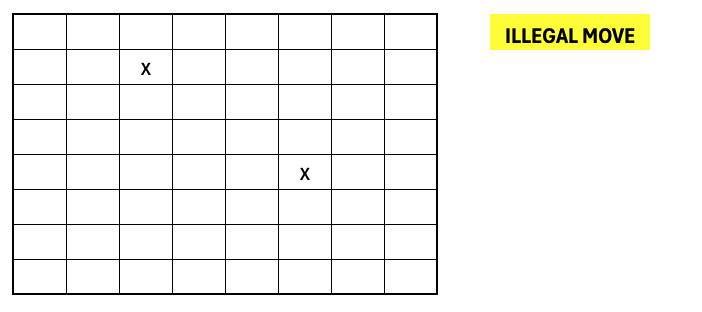



## Solving with Backtracking

We use a recursive approach that builds the board row by row:
1. For each row, try placing a queen in each column.
2. For each attempted position, check whether it's safe:
   - Not in the same column,
   - Not on the same diagonal.
3. If a valid column is found for the current row, **place the queen** and move to the **next row**.
4. If all 8 rows are filled, we've found a solution.

This approach is called **backtracking** — if we reach a dead end, we undo the last step and try a different path.


In [20]:
# Fully commented version of the N-Queens solver with expanded explanation

def is_safe(queens, row, col):
    """
    Determines whether placing a queen at (row, col) is safe
    given the current list of queen placements.

    Parameters:
    - queens: list of current queen column positions for each row. 
              Example: queens[2] = 4 means a queen is in row 2, column 4.
    - row: the row we want to place a new queen
    - col: the column we want to test

    Returns:
    - True if no existing queen threatens this (row, col)
    - False if there is a conflict
    """
    for r in range(row):
        c = queens[r]  # the column of the queen already placed in row r

        # Conflict 1: Another queen is already in the same column
        if c == col:
            return False

        # Conflict 2: Another queen is on the same diagonal
        # Diagonal attack occurs when the difference in rows equals the difference in columns
        if abs(c - col) == abs(r - row):
            return False

    # If no conflict found, it's safe to place the queen
    return True


def solve_n_queens(n=8):
    """
    Solves the N-Queens problem using recursive backtracking.

    Returns:
    - A list of valid board solutions, each represented as a list of column indices
    """
    solutions = []
    queens = [-1] * n  # Track queen column for each row, initialized with -1

    def backtrack(row):
        """
        Try placing a queen in each column of the given row and
        recursively solve for the next row.
        """
        if row == n:
            # All queens placed successfully
            solutions.append(queens[:])  # Store a copy of the current solution
            return

        for col in range(n):
            if is_safe(queens, row, col):
                queens[row] = col      # Place queen at (row, col)
                backtrack(row + 1)     # Recur to place queen in next row
                queens[row] = -1       # Remove queen (backtrack)

    backtrack(0)
    return solutions


# Find and display the first solution found
solutions = solve_n_queens(8)
solution = solutions[0]

# Print the solution board

for row in range(8):
    line = ""
    for col in range(8):
        if solution[row] == col:
            line += "Q "
        else:
            line += ". "
    print(line)


Q . . . . . . . 
. . . . Q . . . 
. . . . . . . Q 
. . . . . Q . . 
. . Q . . . . . 
. . . . . . Q . 
. Q . . . . . . 
. . . Q . . . . 



## Summary

- The N-Queens problem is a **constraint satisfaction problem**, not a numeric optimization.
- We used **recursive backtracking** to explore the solution space.
- This approach is efficient for small boards and ensures all constraints are respected.

This illustrates how combinatorial problems with logic-based constraints are solved differently from linear or nonlinear programming problems.
